In [2]:
from math import sqrt, pi, erf
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.integrate import dblquad

1\. **Radioactive decay chain**

${\rm Tl}^{208}$ decays to ${\rm Pb}^{208}$ with a half-life $\tau$ of 3.052 minutes. Suppose to start with a sample of 1000 Thallium atoms and 0 of Lead atoms.

* Take steps in time of 1 second and at each time-step decide whether each Tl atom has decayed or not, accordingly to the probability $p(t)=1-2^{-t/\tau}$. Subtract the total number of Tl atoms that decayed at each step from the Tl sample and add them to the Lead one. Plot the evolution of the two sets as a function of time  
* Repeat the exercise by means of the inverse transform method: draw 1000 random numbers from the non-uniform probability distribution $p(t)=2^{-t/\tau}\frac{\ln 2}{\tau}$ to represent the times of decay of the 1000 Tl atoms. Make a plot showing the number of atoms that have not decayed as a function of time

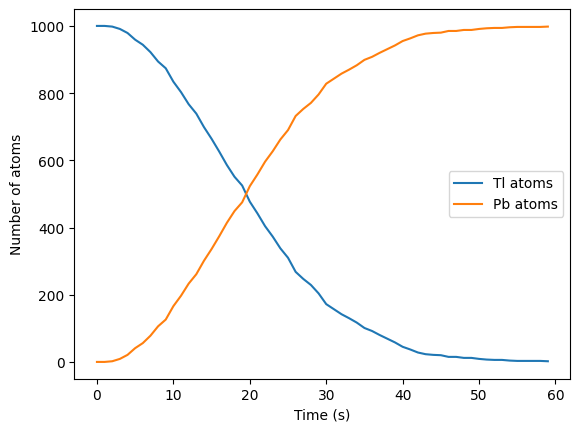

In [8]:

#initial conditions 
tl_atoms = 1000
pb_atoms = 0

tau = 3.052 * 60       # min -> s
t_max = 60
dt = 1 # time stop in 1 second

tl_history = []
pb_history = []
time_history = []

for t in range(0,t_max,dt):
    tl_history.append(tl_atoms)
    pb_history.append(pb_atoms)
    time_history.append(t)

    #possibility of decay 
    p = 1 - 2**(-t/tau)

    # Decide which atoms will decay
    decay = np.random.binomial(tl_atoms, p)

    # Update number of atoms
    tl_atoms -= decay
    pb_atoms += decay

plt.plot(time_history, tl_history, label='Tl atoms')
plt.plot(time_history, pb_history, label='Pb atoms')
plt.xlabel('Time (s)')
plt.ylabel('Number of atoms')
plt.legend()
plt.show()


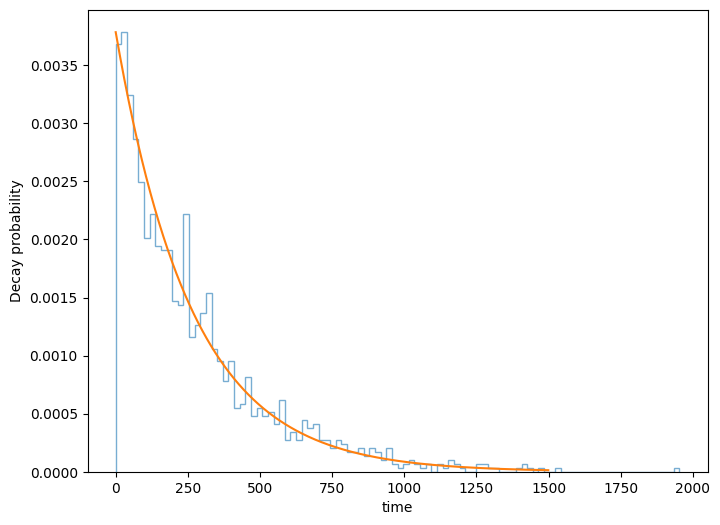

In [14]:
decay_time = 3.052* 60

x = np.arange(1500)
def p(x):
    return pow(2,(-x/decay_time))*np.log(2)/decay_time

y = p(x)

def inv_p(x):
    return -np.log(1-x)*decay_time/(np.log(2))

x1 = np.random.random(1500)
x2 = inv_p(x1)

fig,ax = plt.subplots(figsize = (8,6))
ax.hist(x2,bins = 100, histtype = 'step', density = True, alpha = 0.6)
ax.plot(x,y)
ax.set_xlabel("time")
ax.set_ylabel("Decay probability")
plt.show()

2\. **Monte Carlo integration: hit/miss vs mean value method**

Consider the function: 

$$f(x) =\sin^2{\left( \frac{1}{1-x} \right)}$$

* Plot the function and compute the integral of $f(x)$ between 0 and 2 with the hit/miss method. Evaluate the error of your estimate (hint: repeat the integral $N$ times, and from the distribution of the integrals take the mean value and the standard deviation, the latter rescaled by the appropriate factor)
* Repeat the integral with the mean value method. Evaluate the error and compare it with the previous one.

Integral calculated by hit and miss method: 1.34766
Error estimate: 0.00012688670836616417
Integral estimate (mean value method): 1.34576342212838
Error estimate (mean value method): 6.46732727492277e-05


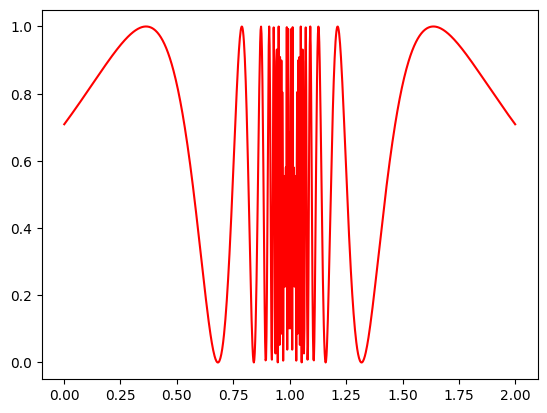

In [5]:
def f(x):
    y = (np.sin(1./(1-x))) ** 2
    return y

x=np.linspace(0.001, 1.999, 1000)
plt.plot(x, f(x), 'r-')

# Monte Carlo integration
N = 100000
count = 0
for i in range(N):
    x = 2 * np.random.random() # x is random uniform between 0 and 2
    y = np.random.random()     # y is random uniform between 0 and 1
    if y < f(x): count += 1
I =  2*1*count / N
print("Integral calculated by hit and miss method:", I)

# Repeat the integral N times and evaluate the error
N_repeats = 1000
integrals = np.zeros(N_repeats)

count = 0
for i in range(N_repeats):
    x = 2 * np.random.random() # x is random uniform between 0 and 2
    y = np.random.random()     # y is random uniform between 0 and 1
    if y < f(x): count += 1
    integrals[i] = (2-0) *(1-0)* count / N 

# calculate the error
mean_integral = np.mean(integrals)
std_integral = np.std(integrals)
error = std_integral / sqrt(N_repeats)
print("Error estimate:", error)


x_samples = np.random.uniform(0, 2, N)
integral_mean_value_est = (2 - 0) * np.mean(f(x_samples))
print("Integral estimate (mean value method):", integral_mean_value_est)


N_repeats = 1000
integrals_2 = np.zeros(N_repeats)
for i in range(N_repeats):
    x_samples = np.random.uniform(0, 2, N)
    integrals_2[i] = (2 - 0) * np.mean(f(x_samples))
mean_integral_2 = np.mean(integrals_2)
std_integral_2 = np.std(integrals_2)
error_2 = std_integral_2 / sqrt(N_repeats)
print("Error estimate (mean value method):", error_2)



3\. **Monte Carlo integration in high dimension**

* Compute the area of a circle of unit radius, by integrating the function:

$$
f(x,y)=
\left\{
\begin{array}{ll}
      1 & x^2+y^2\le 1 \\
      0 & {\rm elsewhere}
\end{array} 
\right.
$$

* Generalize the result for a 10D sphere.

In [7]:
n = 10000

def f(x,y):
    return 1 if x**2 + y**2 < 1 else 0
area , err = dblquad(f, -1, 1, lambda x: -sqrt(1-x**2), lambda x: sqrt(1-x**2))
print("Integral calculated:", area)

Integral calculated: 3.1415926535897967


In [9]:
N = 1000000
dim = 10

def f(x):
	r2 = np.zeros(x.shape[1],float)
	
	for xi in x:
		r2 += xi**2
	
	return r2<1


x = np.random.random((dim,N))*2 - 1

fx = f(x)
I = 2**dim/N * sum(fx)

var = sum(fx**2)/N-(sum(fx)/N)**2 
sigma = 2**dim*sqrt(var/N)
print('I = {} + {}'.format(I,sigma))

I = 2.5374719999999997 + 0.05091102595557485


4\. **Monte Carlo integration with importance sampling** 

Calculate the value of the integral:

$$
I=\int_0^1 \frac{x^{-1/2}}{e^x+1} dx
$$

using the importance sampling method with $w(x)=1/\sqrt{x}$. You should expect a result around 0.84.

In [11]:
import numpy as np


# Number of samples to use for the Monte Carlo integration
n = 10000
s = 0
# Function to be integrated
def f(x):
    return (x**(-1/2))/(np.exp(x) + 1)
# Weight function
def w(x):
    return 1/np.sqrt(x)

def m(x):
    return 1/np.sqrt(x)

X = np.random.rand(n)
for x in X:
    s += f(x)/w(x)*m(x)

r = 1/n * s
print("Integral estimate:", r)



Integral estimate: 0.8338391548011336
